# Crater and Boulder Detection

### Step-1: Importing Necessary libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Step-2: Loading and Displaying the Original Image

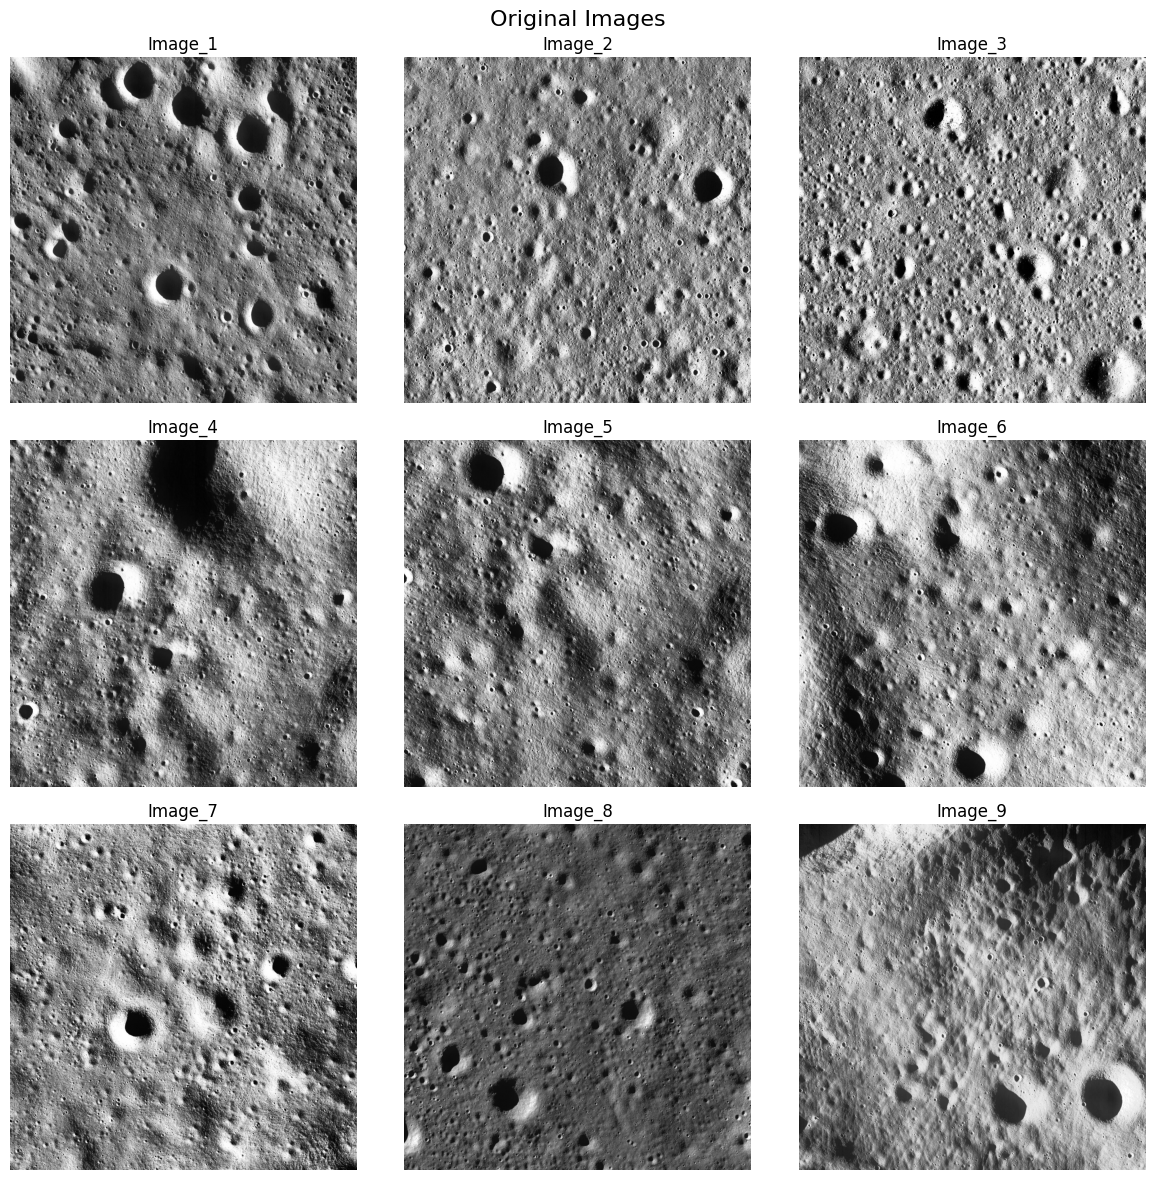

In [2]:
image_names = [f'Images/Image_{i}.jpg' for i in range(1, 10)]

# Dictionary to store processed results
processed_images = {}

# Loading images
for image_path in image_names:
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        raise ValueError(f"Failed to load image: {image_path}")
    
    processed_images[image_path] = {'original': original_image}

# Displaying all results in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Original Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(processed_images[image_names[i]]['original'], cmap='gray')
    ax.set_title(f'Image_{i+1}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('Output_Images/Original_Grayscaled_Images.png')
plt.show()

### Step-3: Histogram Equalization

The following code performs histogram equalization of gray scale images, required to enhance contrast in images wherein some features do not appear visible. It reallocates intensity levels in the image and enhances soft features in regions with low contrast. It is particularly useful in lunar surface images to enhance geology like craters and rocks, which form a necessary step for further analysis. All the images are treated individually and buffered for quick recall, and outputs are given in 3x3 matrix form so visually they can be compared to see what works best. It is an important step since it provides the foundation for more complex image processing operations and enhances features so that correct edges can be detected and features can be extracted easily, eventually resulting in more analytical results at subsequent stages.

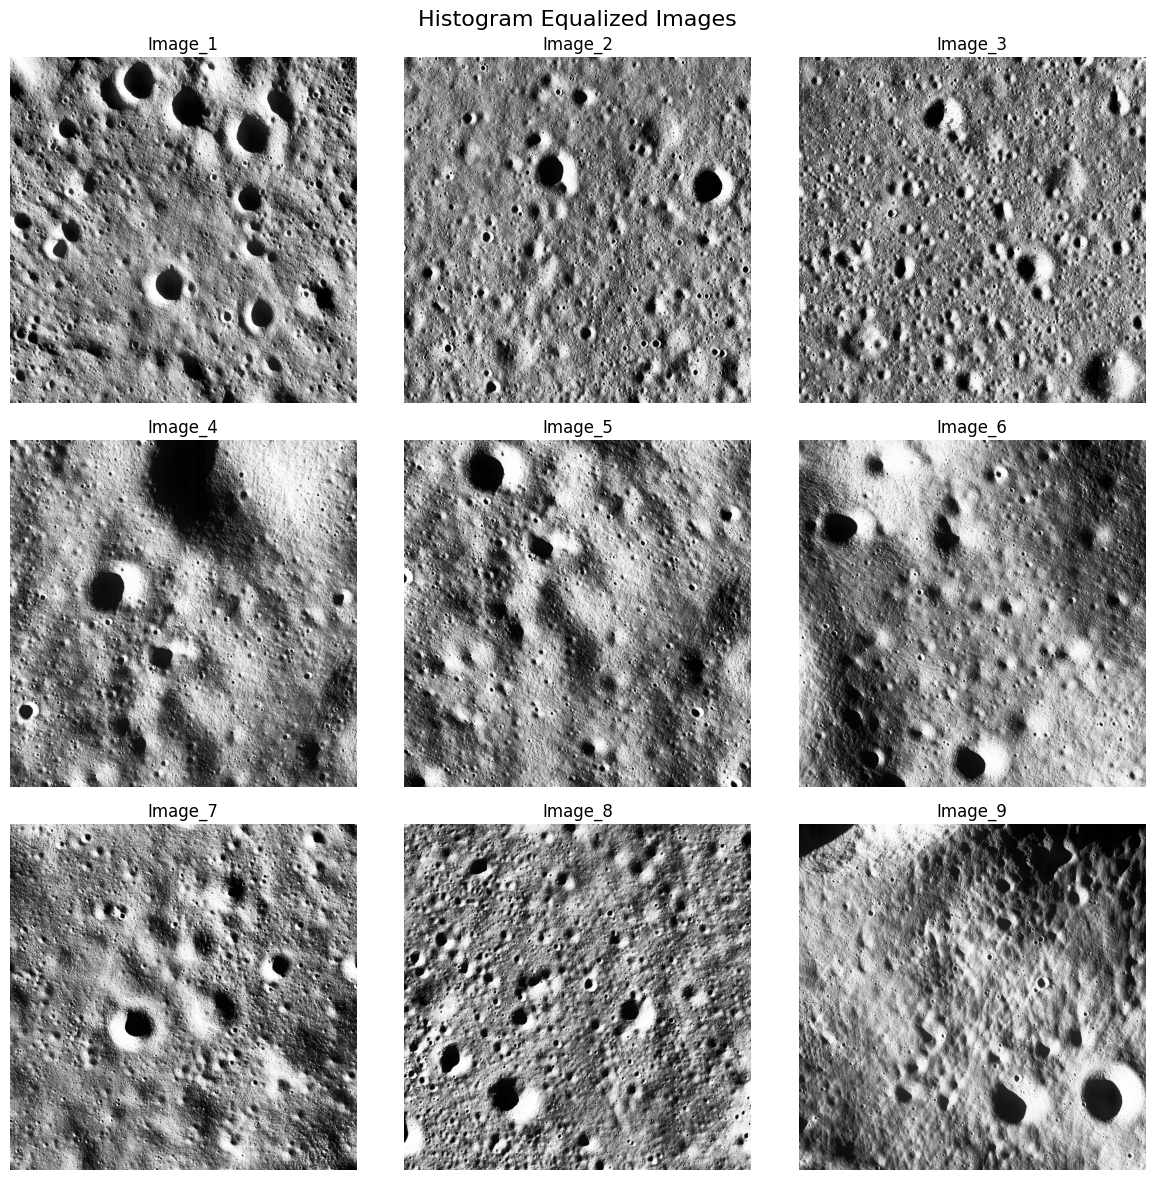

In [3]:
for image_path in image_names:
    processed_images[image_path]['hist_eq'] = cv2.equalizeHist(processed_images[image_path]['original'])

# Displaying all results in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Histogram Equalized Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(processed_images[image_names[i]]['hist_eq'], cmap='gray')
    ax.set_title(f'Image_{i+1}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('Output_Images/Histogram_Equalized_Images.png')
plt.show()

The application of histogram equalization to grayscale images of lunar surfaces has greatly improved the contrast and clarity of surface features. The images so treated now exhibit a more distinct demarcation of the various geological features such as craters and maria, and their identification and analysis are easier. By redistribution of the pixel intensity values, this enhancement technique has highlighted fine textural features that are critical in geological assessments and navigation during lunar explorations. The equalization process has particularly highlighted light areas, such that they are made more conspicuous in comparison to dark surroundings, which is critical in the detection of small surface abnormalities as well as the variation in lunar soil types. This increased understanding is required for correct scientific interpretation and subsequent decision-making for moon missions.

### Step-4: Noise Reduction using Gaussian Blur

The code applies Gaussian blur to already histogram-equalized images with a kernel size of (5, 5). Gaussian blur as a smoothing filter is effective in eliminating image noise and detail, which is necessary in pre-processing the lunar surface images for edge detection procedures. The algorithm eliminates noise and small oscillations in the background by removing the oscillations in intensity, and it becomes easy to detect larger features like craters and boulders. This is particularly useful in situations where the image is noisy, such as space photography, when clear definition of features is necessary for effective analysis. Displaying the blurred images in an array of 3x3 facilitates a visual verification of the effects of smoothing on different images and provides immediate feedback on the efficiency and uniformity of the applied blur. This picture is used to check whether the preprocessing activities are effectively enhancing the significant geological features without over-manipulating the image data.

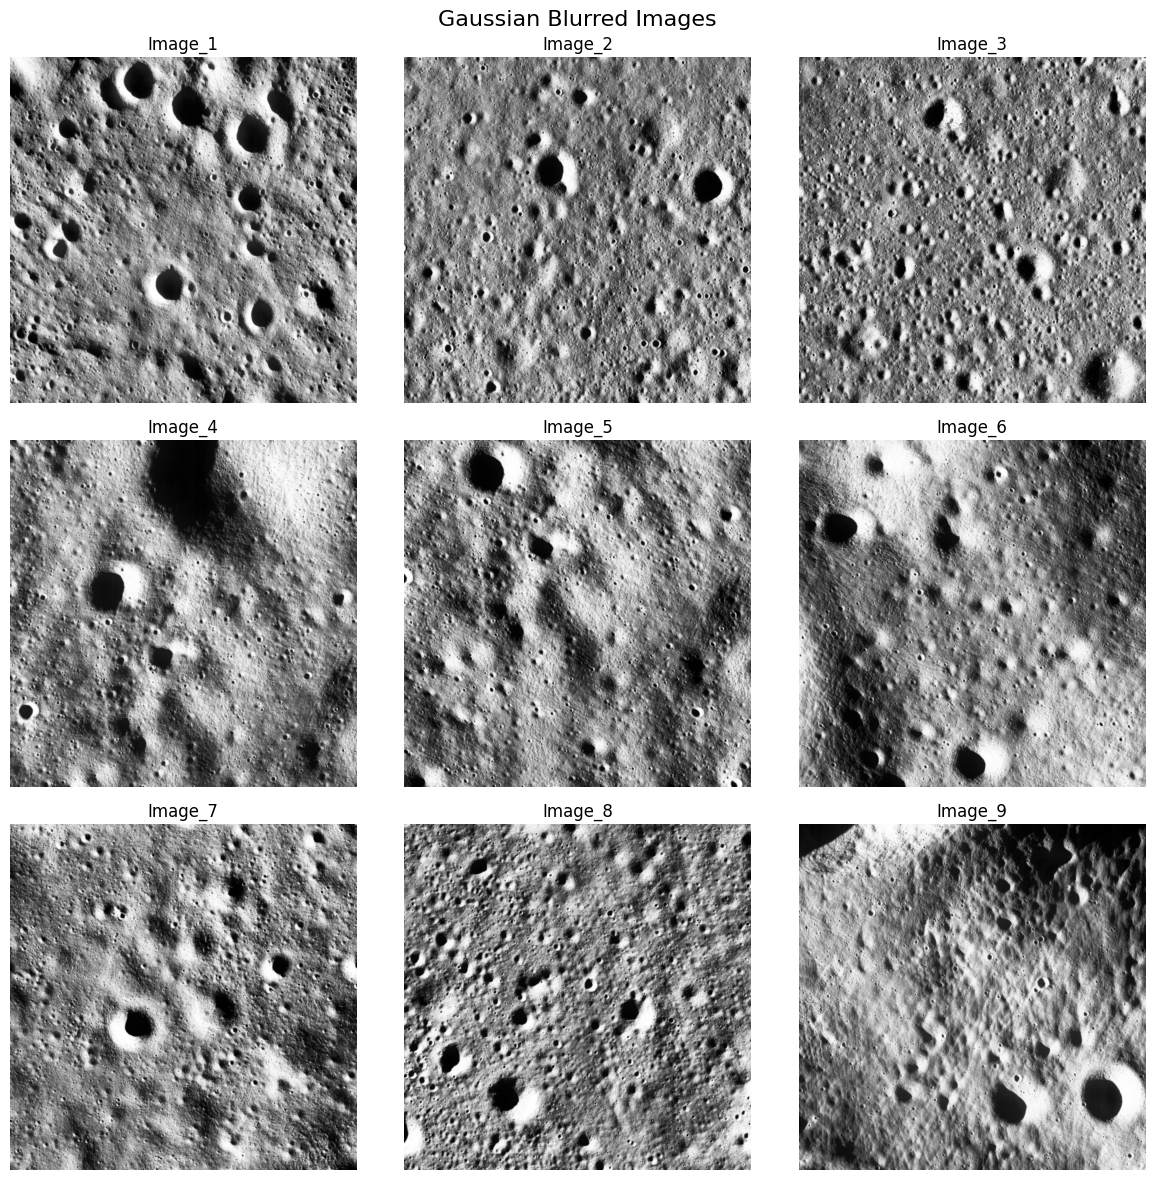

In [4]:
for image_path in image_names:
    processed_images[image_path]['blurred'] = cv2.GaussianBlur(processed_images[image_path]['hist_eq'], (5, 5), 0)

# Displaying all blurred images in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Gaussian Blurred Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(processed_images[image_names[i]]['blurred'], cmap='gray')
    ax.set_title(f'Image_{i+1}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('Output_Images/Gaussian_Blurred_Images.png')
plt.show()

The Gaussian blurred images reveal a remarkable decrease in noise and more detailed features in all nine of the lunar surface captures. The smoothing effect nicely decreases the acuteness of finer details without sacrificing the general structural feature of larger geological forms, such as craters. The output images are less noisy, thus decreasing the visual inspection complexity and allowing focusing on larger, salient features without distraction from granular noise. This preprocessing step is critical to maximize the efficiency of downstream image analysis algorithms, such as edge detection, by minimizing spurious edges due to high-frequency noise. The images are now a cleaner basis on which to detect and analyze boulder structures, where clarity is needed for precise detection and measurement.

### Step-5: Sobel Edge Detection

This code uses Sobel edge detection on Gaussian blurred images to highlight features and edges in lunar surface imagery. Sobel edge detection determines gradient change in image brightness to highlight the edges and separate crucial spatial differences with less noise impact. It calculates both horizontal and vertical gradients and combines them to produce an overall edge map. This method is especially applicable to geologic feature enhancement, such as craters or boulders, on the moon, in order to condition the images for feature extraction and analysis.

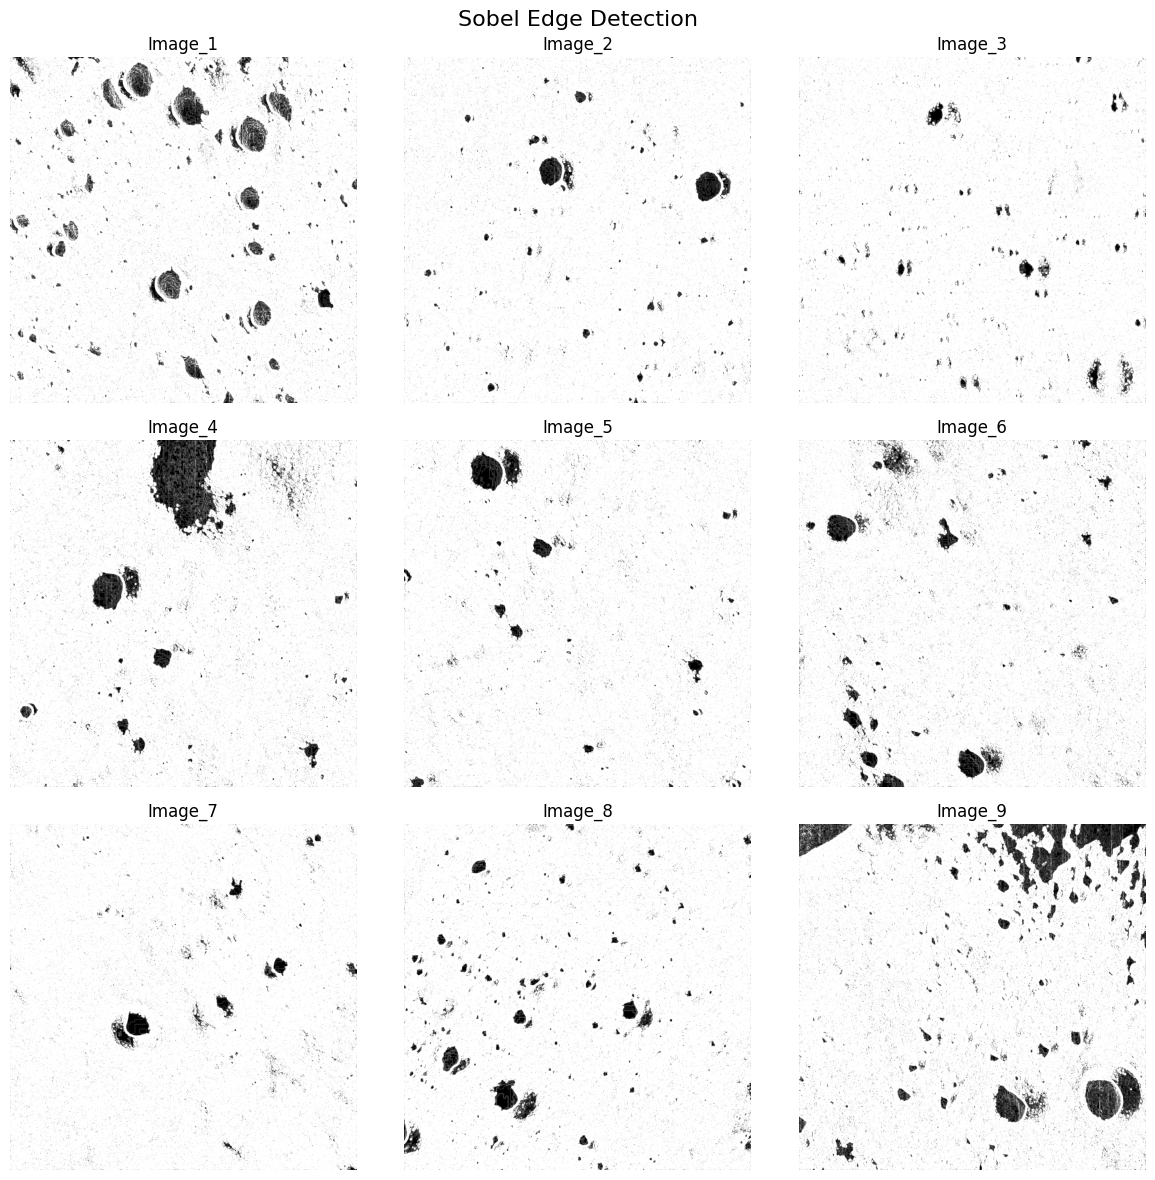

In [5]:
for image_path in image_names:
    blurred_image = processed_images[image_path]['blurred']
    
    # Applying Sobel Edge Detection
    sobelx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)

    # Converting to uint8 format
    abs_sobelx = cv2.convertScaleAbs(sobelx)
    abs_sobely = cv2.convertScaleAbs(sobely)

    # Combining X and Y Sobel
    combined_sobel = cv2.bitwise_or(abs_sobelx, abs_sobely)

    processed_images[image_path]['sobel'] = combined_sobel

# Displaying all Sobel outputs in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Sobel Edge Detection', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(processed_images[image_names[i]]['sobel'], cmap='gray')
    ax.set_title(f'Image_{i+1}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('Output_Images/Sobel_Edge_Detection.png')
plt.show()

The Sobel edge detection applied to these images sharpens the edges of the lunar surface features so that the craters and other geology are starkly visible in dark relief against the lighter color of the background. The vertical and horizontal intensity transitions are enhanced, helping to define the contours and shapes of the boulders and crater rims. The results have mixed performance for the images: there are some images that have well-defined and crisp edges of features, which are more suitable for downstream analysis like contour detection and morphological processing, but others can have over-enhancement, in which even minimal changes in pixel intensity are emphasized as edges. This might cause potential challenges in well separating relevant geological structures with noise and unwanted edge fragments.

### Step-6: Morphological Processing (Dilation + Erosion)

Here, the morphological process of the binary Sobel edge-detected images involves dilation followed by erosion, enhancing connectivity of features and noise removal. Dilation first enlarges the feature edges, acting to close the gaps within detected edges and making the general edge structures more contiguous. This is particularly useful in the detection of contiguous geological structures on the surface of the moon. Finally, erosion refines these edges by deleting small fragments of noise that were perhaps enhanced by dilation, retaining the integrity of crucial features like craters. What remains is a purer, more precise edge map which is vital for subsequent analysis such as feature extraction or classification in moon studies.

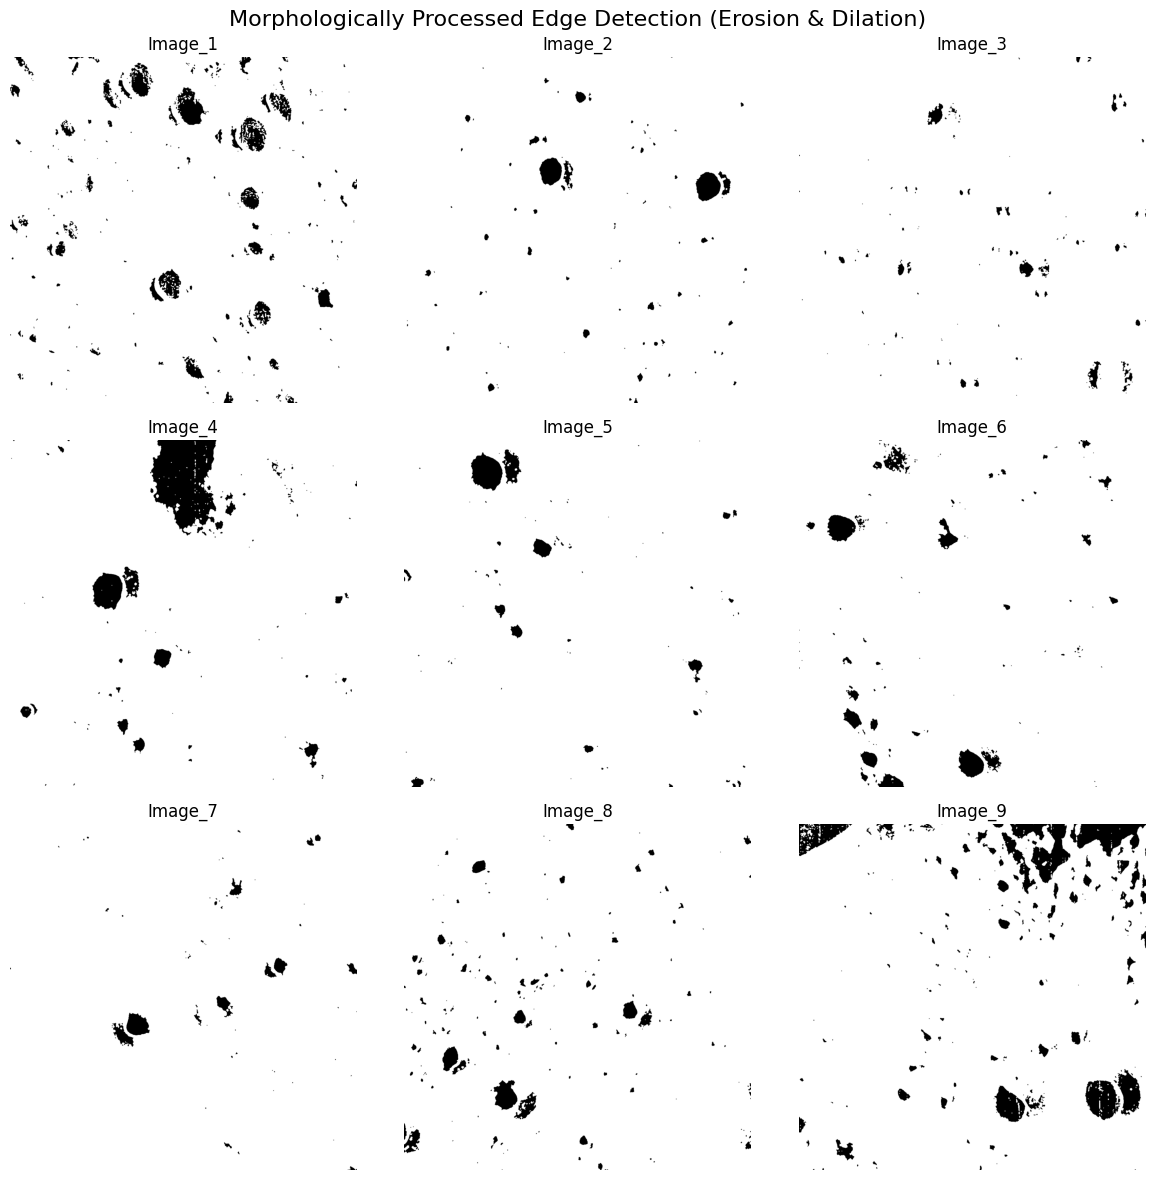

In [6]:
for image_path in image_names:
    sobel_image = processed_images[image_path]['sobel']
    
    # Converting to Binary
    _, binary_sobel = cv2.threshold(sobel_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Defining Structuring Element
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

    # Applying Dilation First (Expands edges to connect broken parts)
    dilated_sobel = cv2.dilate(binary_sobel, kernel, iterations=2)

    # Applying Erosion (Removes small noise while keeping craters)
    eroded_sobel = cv2.erode(dilated_sobel, kernel, iterations=1)

    processed_images[image_path]['processed_sobel'] = eroded_sobel

# Display all processed images in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Morphologically Processed Edge Detection (Erosion & Dilation)', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(processed_images[image_names[i]]['processed_sobel'], cmap='gray')
    ax.set_title(f'Image_{i+1}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('Output_Images/Morphologically Processed Edge Detection (Erosion & Dilation).png')
plt.show()

The morphological image processing with dilation and erosion significantly cleans and smoothes out edges detected by the Sobel filter to separate and highlight geological features such as boulders on a moon's surface. The erosion eliminates the tiny particles and noise to provide the image with less complexities, and dilation expands the size of what is left as well as makes it detectable. It successfully enhances the definition of greater and more meaningful features to make them more visible and easier to interpret.

Despite the enhancement, there are pictures with cracked features or speckle points that cannot be anticipated to fit actual geological formations and reflect the challenge of selecting the optimum morphological parameters that separate over and under feature enhancement. For boulder detection, this processing is very important as it pre-prepares the image to be conditioned for proper subsequent segmentation and analysis in later stages by emphasizing valid size ranges and improving the continuity of the boulder contours.

### Step-7: Contour Detection and Overlay on Original Image

This last step in the image processing chain highlights such features as craters and boulders pointed out on original moon photographs by placing green contours around them. Separate processed images are first transformed into their binary equivalent in order to facilitate detection of contours. Contours are subsequently extracted in order to detect and highlight features clearly. Original images in grayscale are transformed into color if they are grayscale in order to facilitate efficient highlighting via green contours. These contours are indeed hand-drawn onto the colour images for visibility and contrast of features across the lunar surface.

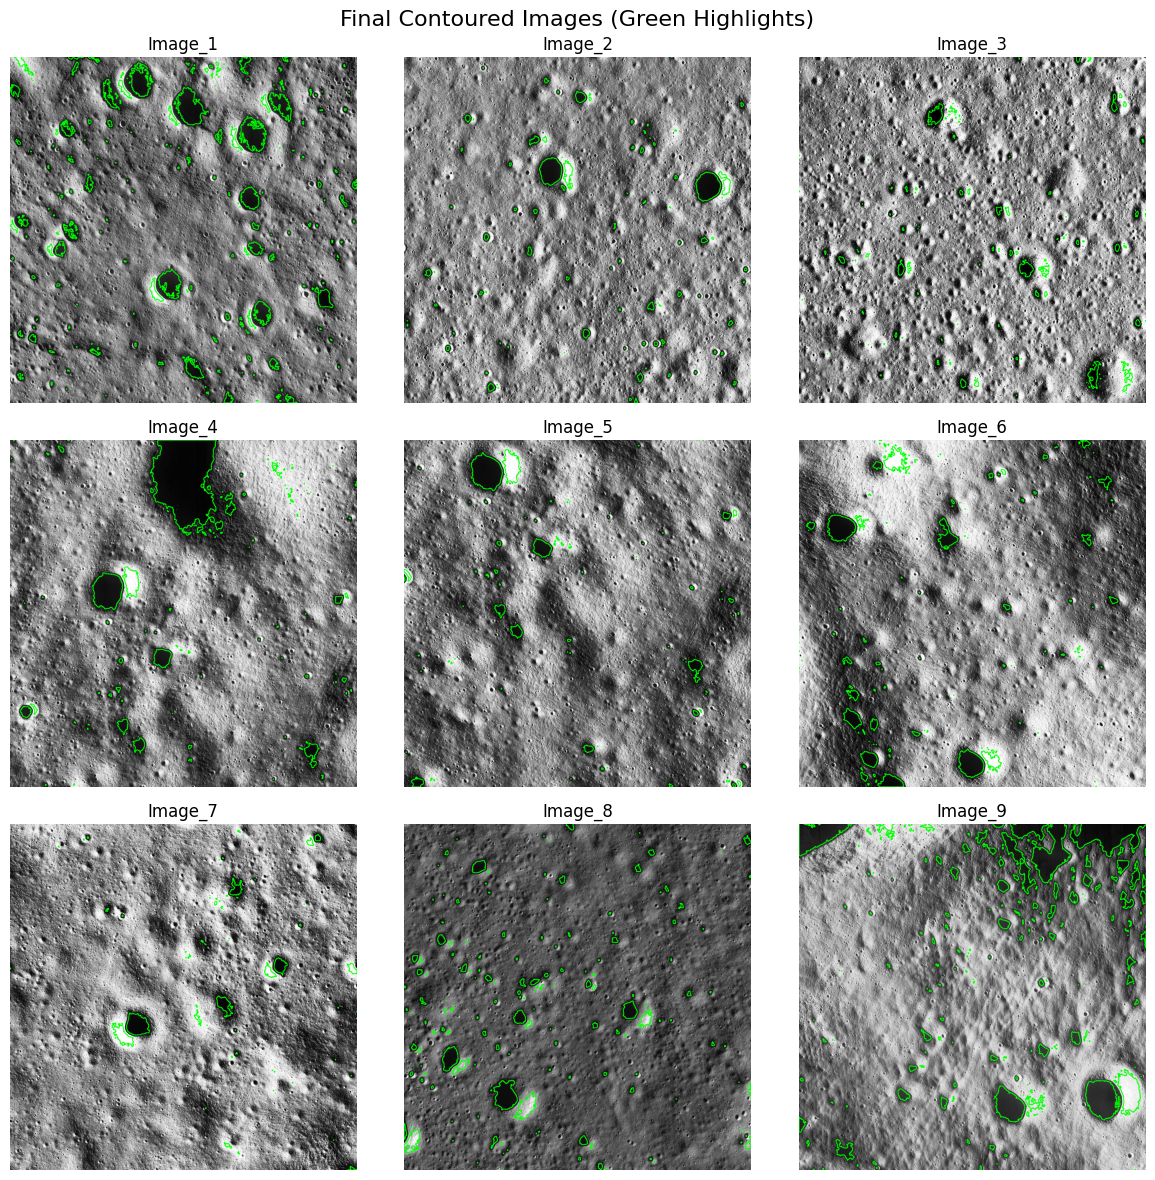

In [7]:
for image_path in image_names:
    opened_sobel = processed_images[image_path]['processed_sobel']
    
    # Converting to Binary
    _, binary_mask = cv2.threshold(opened_sobel, 127, 255, cv2.THRESH_BINARY_INV)

    # Finding Contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Reloading original image in BGR format
    original_bgr = cv2.imread(image_path)
    if original_bgr is None:
        raise ValueError(f"Failed to reload original image: {image_path}")

    # Converting grayscale image to color 
    if len(original_bgr.shape) == 2:
        original_bgr = cv2.cvtColor(original_bgr, cv2.COLOR_GRAY2BGR)

    # Drawing Contours (Green)
    cv2.drawContours(original_bgr, contours, -1, (0, 255, 0), 2)

    processed_images[image_path]['final'] = original_bgr

# Displaying all final images in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Final Contoured Images (Green Highlights)', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(processed_images[image_names[i]]['final'], cv2.COLOR_BGR2RGB))
    ax.set_title(f'Image_{i+1}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('Output_Images/Final Contoured Images (Green Highlights).png')
plt.show()

**Image 1:** This image is very good for crater and boulder identification. Contours are well seen and very near the edges of the geologic features, both identifying large and medium-sized craters very well.

**Image 2:** Contouring in this image is good, particularly on the margins over large craters. Some of the small features are not highlighted, which may be a function of a need to modify parameters to detect finer features.

**Image 3:** The good accuracy of detection is apparent with crisp, distinct green edges around craters. There is quite accurate isolation and tracing of most visible features by the algorithm, except very small craters are not detected.

**Image 4:** While the biggest features are correctly detected, the image suggests that the image has some over-segmentation on boundaries of some craters due to shadows or albedo differences affecting consistency of edge detection.

**Image 5:** The algorithm correctly detects and marks the large craters, but the small boulders within and outside the craters are irregularly marked, showing that there is a need to adjust the sensitivity level of the detection process.

**Image 6:** This image shows a good crater detection with accurate boundary marking. There is good consistency in detecting large and smaller craters, though some very small features are not detected.

**Image 7:** The contouring is good with almost all the prominent craters being identified. The technique has satisfactory boundary definition of craters but misses some of the smaller boulders, as in the case of other images.

**Image 8:** Crater detection is good with proper contouring around most geological features. However, contours around the smaller craters and boulders appear fragmented, indicating improvements in edge detection or morphological processing.

**Image 9:** This shows good detection with well-defined contours on large and small craters. The feature density poses a challenge, but the algorithm works well, albeit with minimal inaccuracies in the contouring of small features.

In general, the final images have high accuracy for contouring large lunar surface features, with good shading of craters. The detection is good in delineating large geological structures, but at times misses delineating smaller craters and boulders in a consistent manner, especially if they are in close proximity to larger ones or in shaded zones. Detection and edge detection parameter threshold values could be adjusted so that the detection becomes even better and consistent in delineating all types of surface features.